# Laboratorio 3

## Nicolás Echeverri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Regresión lineal

### 1. Creación del dataframe

In [36]:
x=list(np.arange(10))
df=pd.DataFrame(data=( {'x':x, 'y':x}  )  )

In [37]:
df

,x,y
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9


### 1) Creación de función de coste 

In [38]:
def cost_function(theta0,theta1, x,y):
    
    m=len(x)
    
    J=1/(2*m)*sum( (theta0+theta1*x-y)**2 )
    return J

### suponiendo $\theta_0=0$

In [39]:
theta1_array=np.arange(-2,2,0.01)
costValues=np.zeros(len(theta1_array))

for i in range(len(theta1_array) ):
    costValue=cost_function(theta0=0,theta1=theta1_array[i],
    x=df['x'].values,
    y=df['y'].values)
    
    costValues[i]=costValue

### 2) gráfica de la función de coste suponiendo $\theta_0=0$

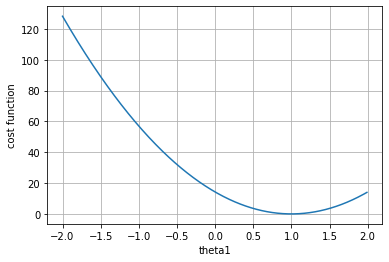

In [40]:
plt.plot(theta1_array,costValues )
plt.ylabel("cost function")
plt.xlabel("theta1")
plt.grid()

In [41]:
minIndex=np.argmin(costValues)
theta1_best=theta1_array[minIndex]
print("el valor mínimo de theta1: ",theta1_best)

el valor mínimo de theta1:  1.0000000000000027


### Representación gráfica del ajuste

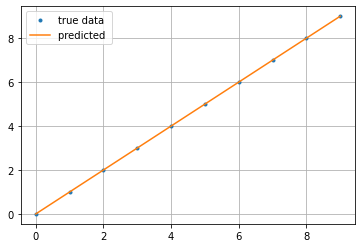

In [42]:
theta0=0
ypredicted=theta0+df['x'].values*theta1_best


plt.plot( df['x'].values,df['y'].values,".", label="true data" )
plt.plot(df['x'].values, ypredicted , label="predicted ")
plt.grid()

plt.legend()

### Realizando búsqueda de valores que minimizan la función de coste por fuerza bruta Sin suponer $\theta_0$, 

In [43]:
theta0_array=np.arange(-0.5,0.5,0.001)
theta1_array=np.arange(0.5,1.5,0.001)


costValues=np.zeros((len(theta1_array),len(theta1_array) )  )

for i in range(len(theta1_array) ):
    for j in range(len(theta0_array) ):
    
        costValue=cost_function(theta0=theta0_array[j],theta1=theta1_array[i],
        x=df['x'].values,
        y=df['y'].values )
    
        costValues[i,j]=costValue

In [44]:
index_theta0,index_theta1 = np.unravel_index(np.argmin(costValues, axis=None), costValues.shape)

In [45]:
print('theta1_min:',theta1_array[index_theta1],'theta0_min:', theta0_array[index_theta0] )

theta1_min: 1.0000000000000004 theta0_min: 4.440892098500626e-16


### Gráfica de contorno

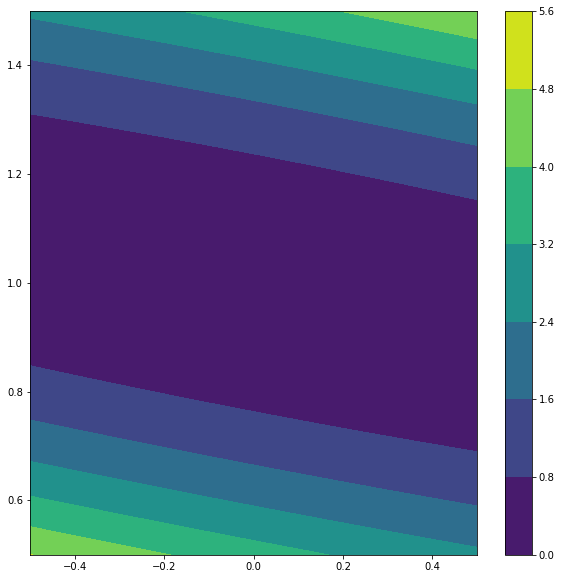

In [46]:
plt.figure(figsize=(10,10) )
h = plt.contourf(theta0_array, theta1_array, costValues )
#plt.axis('scaled')
plt.colorbar()
plt.show()


### Gráfica 3D

In [47]:
from mpl_toolkits.mplot3d import Axes3D

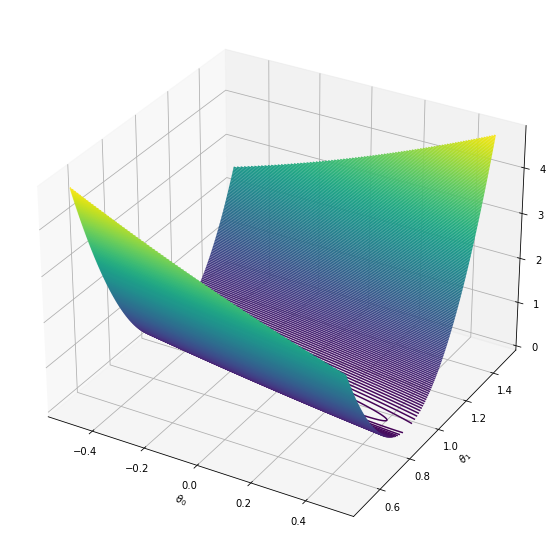

In [48]:
fig = plt.figure(figsize=(10,10) )
ax = fig.add_subplot(111,projection='3d')
#ax.plot_surface(theta0_array, theta1_array, costValues)
ax.contour(theta0_array, theta1_array, costValues, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
#ax.set_zlim(0,20)
plt.show()

### Expresión teórica para las funciones de coste

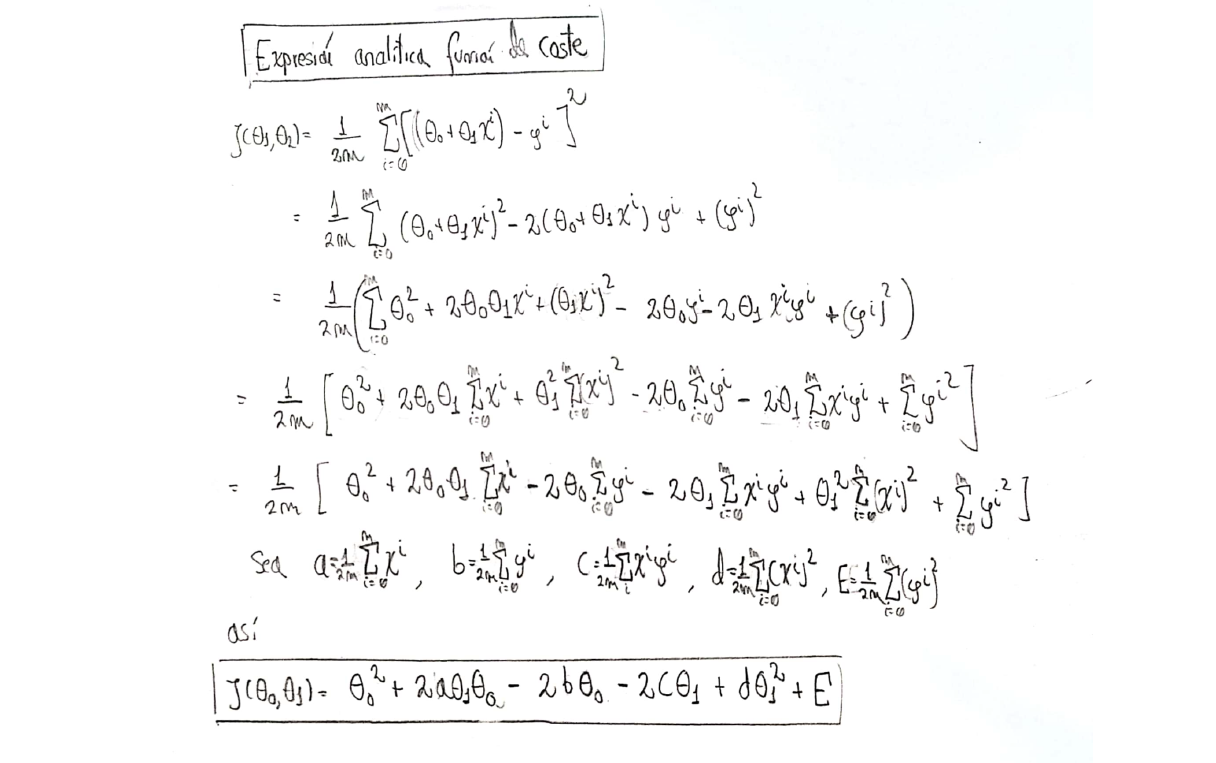

In [56]:
def analytic_cost_function(theta0,theta1,x,y):
    m=len(x)
    
    x=np.array(x)
    y=np.array(y)
    
    theta0, theta1 = np.meshgrid(theta0, theta1)

    
    a=1/(2*m)*sum(x)
    b=1/(2*m)*sum(y)
    c=1/(2*m)*sum(x*y)
    d=1/(2*m)*sum(x*x)
    E=1/(2*m)*sum(y*y)
    
    return theta0**2 + 2*a*theta0*theta1 -2*b*theta0 -2*c*theta1 +d*theta1**2+E
    
    

In [57]:
x=df['x'].values
y=df['y'].values

In [62]:
theta0=np.arange(-5,5,0.01)
theta1=np.arange(-5,5,0.01)

J=analytic_cost_function(theta0,theta1,x,y)

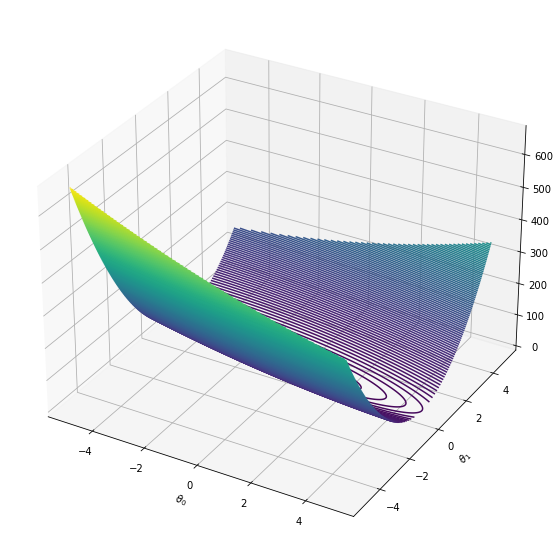

In [63]:
fig = plt.figure(figsize=(10,10) )
ax = fig.add_subplot(111,projection='3d')
#ax.plot_surface(theta0_array, theta1_array, costValues)
ax.contour(theta0, theta1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
#ax.set_zlim(0,20)
plt.show()

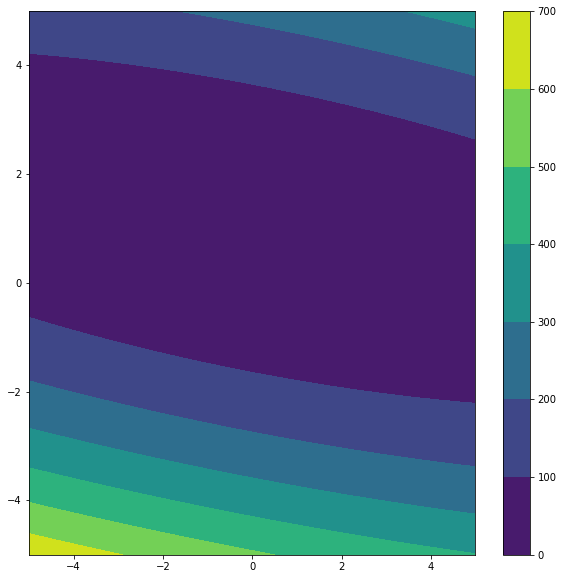

In [64]:
plt.figure(figsize=(10,10) )
h = plt.contourf(theta0, theta1, J )
#plt.axis('scaled')
plt.colorbar()
plt.show()


## Gradiente descendente

### Para la función $f(x)=(x-4)^2$ , $f'(x)=2(x-4)$

In [15]:
def gradient_descent(w0, alpha,f,f_prime,n):
    
    W=[]
    for i in range(n):
        w1=w0-alpha*f_prime(w0)
        W.append(w1)        
        if f(w0)-f(w1) <1e-4:
            break
        w0=w1
   
    return W

def function(x):
    return (x-4)**2

def function_dev(x):
    return 2*(x-4)
    

In [16]:
values=gradient_descent(w0=1, alpha=0.1, f= function, f_prime=function_dev,n=1000)

In [17]:
values

[1.6,
 2.08,
 2.464,
 2.7712,
 3.01696,
 3.213568,
 3.3708544,
 3.49668352,
 3.597346816,
 3.6778774528,
 3.74230196224,
 3.793841569792,
 3.8350732558336,
 3.86805860466688,
 3.894446883733504,
 3.9155575069868034,
 3.932446005589443,
 3.945956804471554,
 3.9567654435772432,
 3.9654123548617948,
 3.9723298838894356,
 3.9778639071115487,
 3.982291125689239,
 3.985832900551391,
 3.988666320441113]

In [18]:
print("el mínimo de la función es:", function(values[-1] ), "con w:",  values[-1])

el mínimo de la función es: 0.00012845229234353253 con w: 3.988666320441113


### Para la función $f(x,y)=sin(x^2/2 +y^4/4 + 3)*cos(2x+1-e^y)$

#### Sus derivadas parciales son:
$\partial_y f(x,y)=e^y  sin(y^4/4-x^2/2-3) sin(e^y-2x-1)-y^3 cos(y^4/4-x^2/2-3) cos(e^y-2x-1)$

$\partial_x f(x,y)=x cos(2x-e^y+1) cos(x^2/2-y^4/4+3)-2 sin(2x-e^y+1) sin(x^2/2-y^4/4+3)$

In [19]:
def gradient_descent2D(w0, alpha,f,f_primeX,f_primeY,n):
    w0x,w0y=w0

    Wx=[]
    Wy=[]
    for i in range(n):
        
        w1x=w0x-alpha*f_primeX(w0x,w0y)
        w1y=w0y-alpha*f_primeY(w0x,w0y)

        Wx.append(w1x)
        Wy.append(w1y) 
        
        
        if (f(w0x,w0y)-f(w1x,w1y) )<1e-6:
            break
        w0x=w1x
        w0y=w1y
   
    return Wx,Wy

def function(x,y):
    return np.sin(x**2/2 +y**4/4 + 3)*np.cos(2*x+1-np.e**y)

def function_devx(x,y):
    return x*np.cos(2*x-np.e**y+1)*np.cos(x**2/2-y**4/4+3)-2*np.sin(2*x-np.e**y+1)*np.sin(x**2/2-y**4/4+3)

def function_devy(x,y):
    return np.e**y* np.sin(y**4/4-x**2/2-3)*np.sin(np.e**y-2*x-1)-y**3 *np.cos(y**4/4-x**2/2-3)*np.cos(np.e**y-2*x-1)
    
    

In [20]:
X,Y=gradient_descent2D(w0=(0.1,0.1), alpha=0.01,
                   f=function,
                   f_primeX=function_devx,
                   f_primeY=function_devy,n=10000)

In [21]:
print("el valor mínimo encontrado es: ",function(X[-1],Y[-1]))
print(f"este valor se da en x={X[-1]}, y={Y[-1]} ")

el valor mínimo encontrado es:  -0.71263486817737
este valor se da en x=1.5660872743451795, y=1.2107364589479377 


In [22]:
pathFunction=function(np.array(X),np.array(Y) )

In [23]:
size=4

x=np.arange(-size,size,0.1)
y=np.arange(-size,size,0.1)

xv,yv=np.meshgrid(x,y)
zv=function(xv,yv)

Text(0.5, 0.5, '$\\theta_1$')

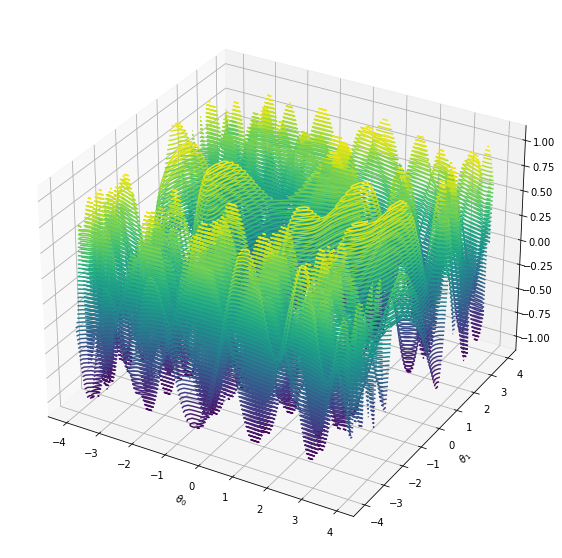

In [24]:
fig = plt.figure(figsize=(10,10) )
ax = fig.add_subplot(111,projection='3d')
#ax.plot_surface(theta0_array, theta1_array, costValues)
ax.contour(x, y, zv, 50,   linestyles="solid")
ax.scatter(X[-1],Y[-1],function(X[-1],Y[-1]), s=200, color="red")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
#ax.set_zlim(0,20)


Text(0.5, 0.5, '$\\theta_1$')

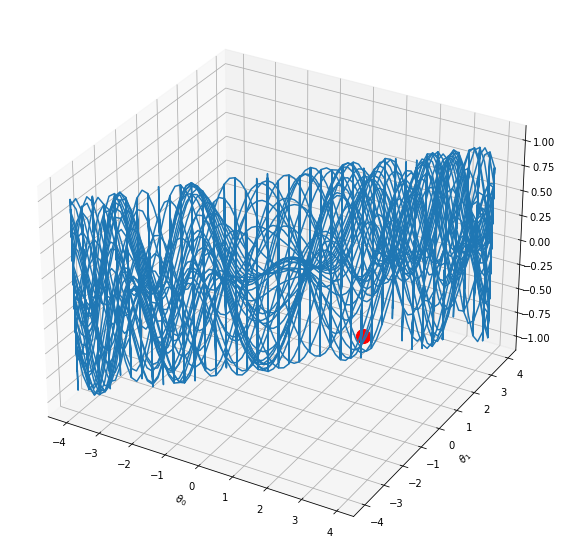

In [25]:
fig = plt.figure(figsize=(10,10) )
ax = fig.add_subplot(111,projection='3d')
#ax.plot_surface(theta0_array, theta1_array, costValues)
ax.plot_wireframe(x, y, zv,   linestyles="solid")
ax.scatter(X[-1],Y[-1],function(X[-1],Y[-1]), s=200, color="red")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")


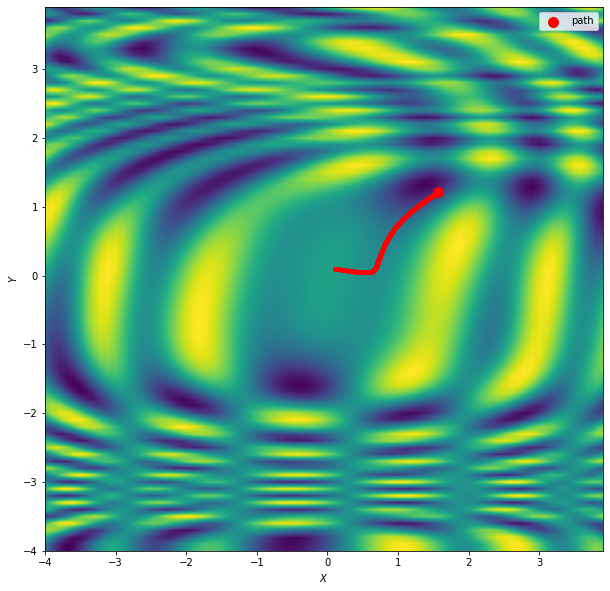

In [26]:
fig = plt.figure(figsize=(10,10) )
ax = fig.add_subplot(111)
#ax.plot_surface(theta0_array, theta1_array, costValues)
ax.contourf(x, y, zv, 200,   linestyles="solid")
ax.scatter(X[-1],Y[-1],color="red",s=100,label="path")
pathFunction
ax.scatter(X,Y,color="red",s=10)
ax.set_xlabel("$X$")
ax.set_ylabel("$Y$")
ax.legend()

## Regresión lineal usando sk-learn

In [27]:
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)

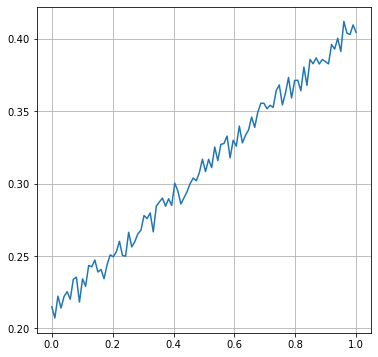

In [28]:
plt.figure(figsize=(6,6))
plt.plot(X,y)
plt.grid()

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
X=X.reshape((-1,1))
X[:10]

array([[0.        ],
       [0.01010101],
       [0.02020202],
       [0.03030303],
       [0.04040404],
       [0.05050505],
       [0.06060606],
       [0.07070707],
       [0.08080808],
       [0.09090909]])

In [31]:
linear=LinearRegression()
linear.fit(X,y)

LinearRegression()

In [32]:
linear.coef_[0]

0.19722933256950972

In [33]:
linear.coef_[0],linear.intercept_

(0.19722933256950972, 0.2117278963287489)

Valores exactos: $\theta_1=0.2$ , $\theta_0=0.2$

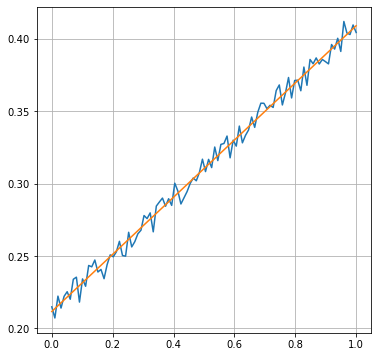

In [34]:
plt.figure(figsize=(6,6))
plt.plot(X,y)
plt.plot( X,X*linear.coef_[0]+ linear.intercept_)
plt.grid()